In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
file_path = "/content/drive/MyDrive/UNICEF_Storytelling_Project/unicef_indicator_2 .csv"
df = pd.read_csv(file_path)

In [ ]:
df.head()

,country,alpha_2_code,alpha_3_code,numeric_code,indicator,time_period,obs_value,sex,unit_multiplier,unit_of_measure,observation_status,observation_confidentaility,time_period_activity_related_to_when_the_data_are_collected,current_age
0,Afghanistan,AF,AFG,4,Mortality rate age 10-14,1990,7.857009,Female,NaN,"Deaths per 1,000 children aged 10",Normal value,NaN,NaN,Total
1,Afghanistan,AF,AFG,4,Mortality rate age 10-14,1991,7.138557,Female,NaN,"Deaths per 1,000 children aged 10",Normal value,NaN,NaN,Total
2,Afghanistan,AF,AFG,4,Mortality rate age 10-14,1992,6.470121,Female,NaN,"Deaths per 1,000 children aged 10",Normal value,NaN,NaN,Total
3,Afghanistan,AF,AFG,4,Mortality rate age 10-14,1993,5.878975,Female,NaN,"Deaths per 1,000 children aged 10",Normal value,NaN,NaN,Total
4,Afghanistan,AF,AFG,4,Mortality rate age 10-14,1994,5.331355,Female,NaN,"Deaths per 1,000 children aged 10",Normal value,NaN,NaN,Total


In [ ]:
print(df["indicator"].unique())
print(df["sex"].unique())

['Mortality rate age 10-14']
['Female' 'Male' 'Total']


In [ ]:
df["indicator"] = df["indicator"].str.strip()
df["sex"] = df["sex"].str.strip()

In [ ]:
df_filtered = df[
    (df["indicator"] == "Mortality rate age 10-14") &
    (df["sex"] == "Total")
]

In [ ]:
df_mortality = df_filtered.groupby("time_period", as_index=False)["obs_value"].mean()

In [ ]:
!pip install plotnine

In [ ]:
import pandas as pd
from plotnine import *

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/UNICEF_Storytelling_Project/unicef_indicator_2 .csv")

In [ ]:
df_filtered = df[
    (df["indicator"] == "Mortality rate age 10-14") &
    (df["sex"] == "Total")
]

In [ ]:
df_avg_by_year = df_filtered.groupby("time_period", as_index=False)["obs_value"].mean()

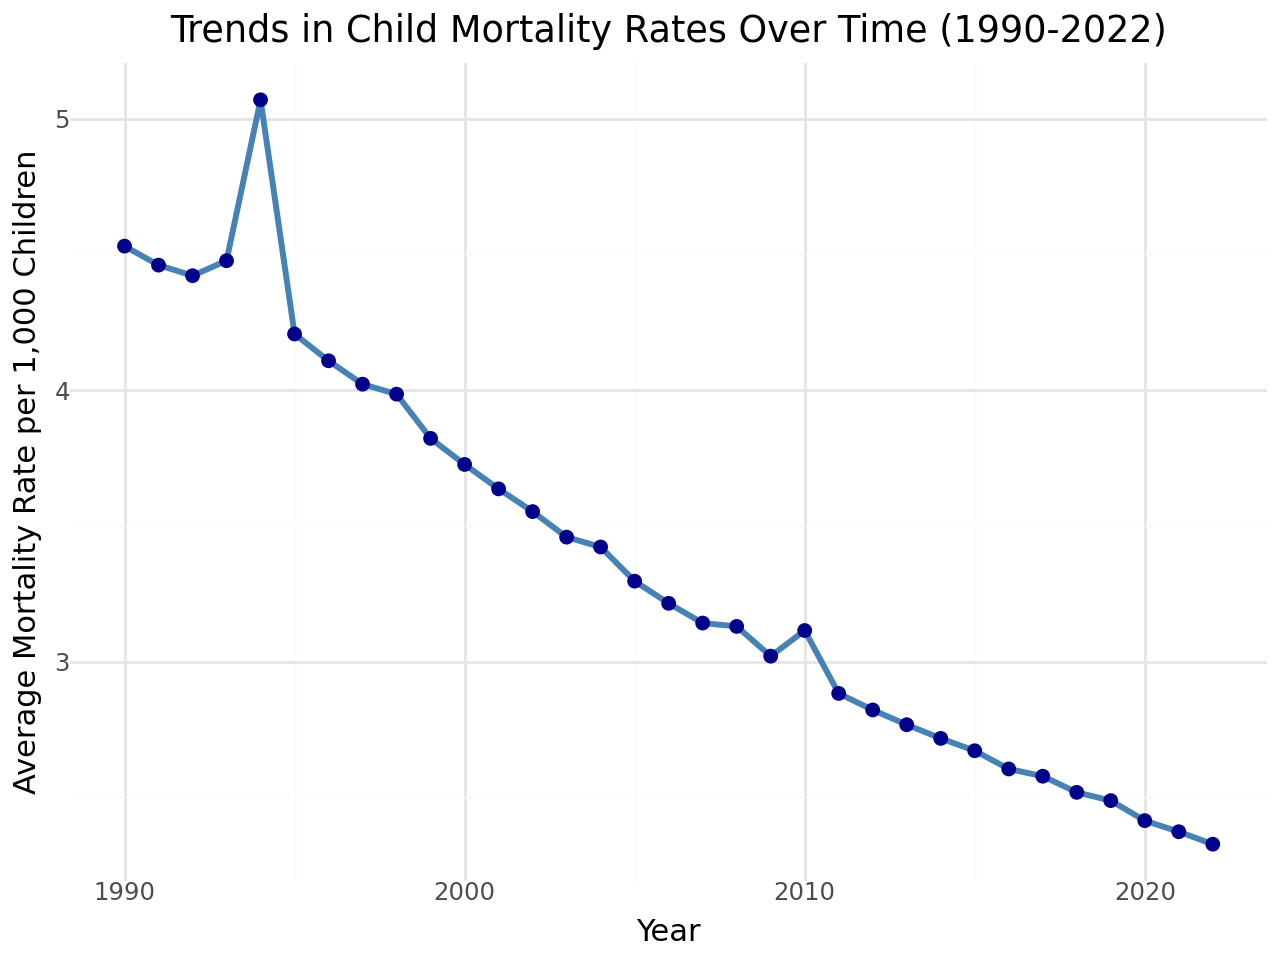

In [ ]:
(
    ggplot(df_avg_by_year) +
    aes(x="time_period", y="obs_value") +
    geom_line(color="steelblue", size=1.2) +
    geom_point(color="darkblue", size=2) +
    labs(
        title= "Trends in Child Mortality Rates Over Time (1990-2022)",
        x="Year",
        y="Average Mortality Rate per 1,000 Children"
    ) +
    theme_minimal()
)

In [ ]:
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_minimal

# Assuming df_avg_by_year is your DataFrame
plot = (ggplot(df_avg_by_year)
        + aes(x='time_period', y='obs_value')
        + geom_line(color='steelblue', size=1.2)
        + geom_point(color='darkblue', size=2)
        + labs(
            title="Trends in Child Mortality Rates Over Time (1990-2022)",
            x="Year",
            y="Average Mortality Rate per 1,000 Children"
        )
        + theme_minimal())

# Print the plot to display it
print(plot)

# Convert plotnine object to matplotlib object
fig = plot.draw()

# Save the figure as a PNG file
fig.savefig('child_mortality_trends.png', dpi=300)

# Use this if you're in Google Colab to download the file
from google.colab import files
files.download('child_mortality_trends.png')


<ggplot: (640 x 480)>


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
!pip install plotly

In [ ]:
import pandas as pd
import plotly.graph_objects as go

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/UNICEF_Storytelling_Project/unicef_indicator_2 .csv")
meta = pd.read_csv("/content/drive/MyDrive/UNICEF_Storytelling_Project/unicef_metadata.csv")

In [ ]:
df["indicator"] = df["indicator"].str.strip().str.replace("–", "-")
df["sex"] = df["sex"].str.strip()
df["alpha_3_code"] = df["alpha_3_code"].str.strip()
meta["alpha_3_code"] = meta["alpha_3_code"].str.strip()

In [ ]:
df_2022 = df[(df["time_period"] == 2022)]
meta_2022 = meta[(meta["year"] == 2022)]

In [ ]:
df_mort = df_2022[(df_2022["indicator"] == "Child mortality rate (10-14)") & (df_2022["sex"] == "Total")]

In [ ]:
matched_codes = list(set(df["alpha_3_code"]).intersection(set(meta["alpha_3_code"])))

In [ ]:
df_filtered = df[df["alpha_3_code"].isin(matched_codes)]
meta_filtered = meta[meta["alpha_3_code"].isin(matched_codes)]

In [ ]:
df_2022 = df_filtered[(df_filtered["time_period"] == 2022) & (df_filtered["sex"] == "Total")]
meta_2022 = meta_filtered[meta_filtered["year"] == 2022]

In [ ]:
mort_avg_2022 = df_2022.groupby("alpha_3_code", as_index=False)["obs_value"].mean()
mort_avg_2022.rename(columns={"obs_value": "child_mortality_2022"}, inplace=True)

gdp_avg_2022 = meta_2022.groupby("alpha_3_code", as_index=False)["GDP per capita (constant 2015 US$)"].mean()
gdp_avg_2022.rename(columns={"GDP per capita (constant 2015 US$)": "gdp_2022"}, inplace=True)

In [ ]:
df_map = pd.merge(mort_avg_2022, gdp_avg_2022, on="alpha_3_code", how="inner")

In [ ]:
print("Merged df_map shape:", df_map.shape)
print(df_map.head())

Merged df_map shape: (194, 3)
  alpha_3_code  child_mortality_2022      gdp_2022
0          AFG              4.334728    377.665627
1          AGO              6.084402   2382.022640
2          ALB              0.962549   5154.827498
3          AND              0.400834  39780.396612
4          ARE              0.619401  42687.720718


In [ ]:
df_merged = pd.merge(
    df_2022[["country", "alpha_3_code", "obs_value"]],
    meta_2022[["alpha_3_code", "GDP per capita (constant 2015 US$)"]],
    on="alpha_3_code",
    how="inner"
)

In [ ]:
df_merged.rename(columns={"obs_value": "mortality_rate",
                          "GDP per capita (constant 2015 US$)": "gdp_per_capita"}, inplace=True)

In [ ]:
bins = [0, 5000, 14999, 34999, float("inf")]
labels = ['Low Income', 'Medium-Low', 'Medium-High', 'High Income']


In [ ]:
df_merged["income_level"] = pd.cut(df_merged["gdp_per_capita"], bins=bins, labels=labels)

In [ ]:
colorscale = [
    [0, "rgb(198,219,239)"],
    [0.25, "rgb(158,202,225)"],
    [0.5, "rgb(107,174,214)"],
    [0.75, "rgb(49,130,189)"],
    [1, "rgb(178,24,43)"]
]


In [ ]:
df_merged["mortality_percent"] = df_merged["mortality_rate"] * 0.1

In [ ]:
colorscale = [
    [0.0, "#edf8fb"],
    [0.2, "#b3cde3"],
    [0.4, "#8c96c6"],
    [0.6, "#8856a7"],
    [0.8, "#de2d26"],
    [1.0, "#a50f15"]
]

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations = df_merged['alpha_3_code'],
    z = df_merged['mortality_percent'],
    zmin = 0,
    zmax = 1.5,
    text = df_merged.apply(lambda row: f"{row['country']}<br>Mortality: {row['mortality_percent']:.2f}%<br>Income: {row['income_level']}", axis=1),
    colorscale = colorscale,
    colorbar_title = "Mortality<br>(%)",
    marker_line_color='black',
    marker_line_width=0.5
))

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='natural earth'
    )
)

fig.show()

In [5]:
fig.write_html("/content/map.html")

In [6]:
from google.colab import files
files.download('/content/map.html')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.8 MB/s eta 0:00:00


In [ ]:
import plotly.graph_objects as go
from google.colab import files


In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations = df_merged['alpha_3_code'],
    z = df_merged['mortality_percent'],
    zmin = 0,
    zmax = 1.5,
    text = df_merged.apply(lambda row: f"{row['country']}<br>Mortality: {row['mortality_percent']:.2f}%<br>Income: {row['income_level']}", axis=1),
    colorscale = colorscale,
    colorbar_title = "Mortality<br>(%)",
    marker_line_color='black',
    marker_line_width=0.5
))

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='natural earth'
    )
)

# Save the figure as a PNG file
fig.write_image('mortality_map.png', scale=3)  # Use scale=3 for higher resolution

# Allow the user to download the PNG file
files.download('mortality_map.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install plotnine==0.12.3 mizani==0.9.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.7/73.7 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: mizani
    Found existing installation: mizani 0.13.3
    Uninstalling mizani-0.13.3:
      Successfully uninstalled mizani-0.13.3
  Attempting uninstall: plotnine
    Found existing installation: plotnine 0.14.5
    Uninstalling plotnine-0.14.5:
      Successfully uninstalled plotnine-0.14.5


In [ ]:
import pandas as pd
from plotnine import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
indicator = pd.read_csv("/content/drive/MyDrive/UNICEF_Storytelling_Project/unicef_indicator_2 .csv")
meta = pd.read_csv("/content/drive/MyDrive/UNICEF_Storytelling_Project/unicef_metadata.csv")

In [ ]:
indicator_2022 = indicator[(indicator['time_period'] == 2022) & (indicator['obs_value'].notna())]
meta_2022 = meta[(meta['year'] == 2022) &
                 (meta['Life expectancy at birth, total (years)'].notna()) &
                 (meta['GDP per capita (constant 2015 US$)'].notna())]

In [ ]:
merged = pd.merge(indicator_2022, meta_2022, on='alpha_3_code', suffixes=('_indicator', '_meta'))

In [ ]:
def gdp_level(gdp):
    if gdp < 5000:
        return "Low Income"
    elif gdp < 15000:
        return "Medium-Low"
    elif gdp < 35000:
        return "Medium-High"
    else:
        return "High Income"

In [ ]:
merged['GDP Level'] = merged['GDP per capita (constant 2015 US$)'].apply(gdp_level)

In [ ]:
merged = merged.rename(columns={"Life expectancy at birth, total (years)": "life_expectancy"})

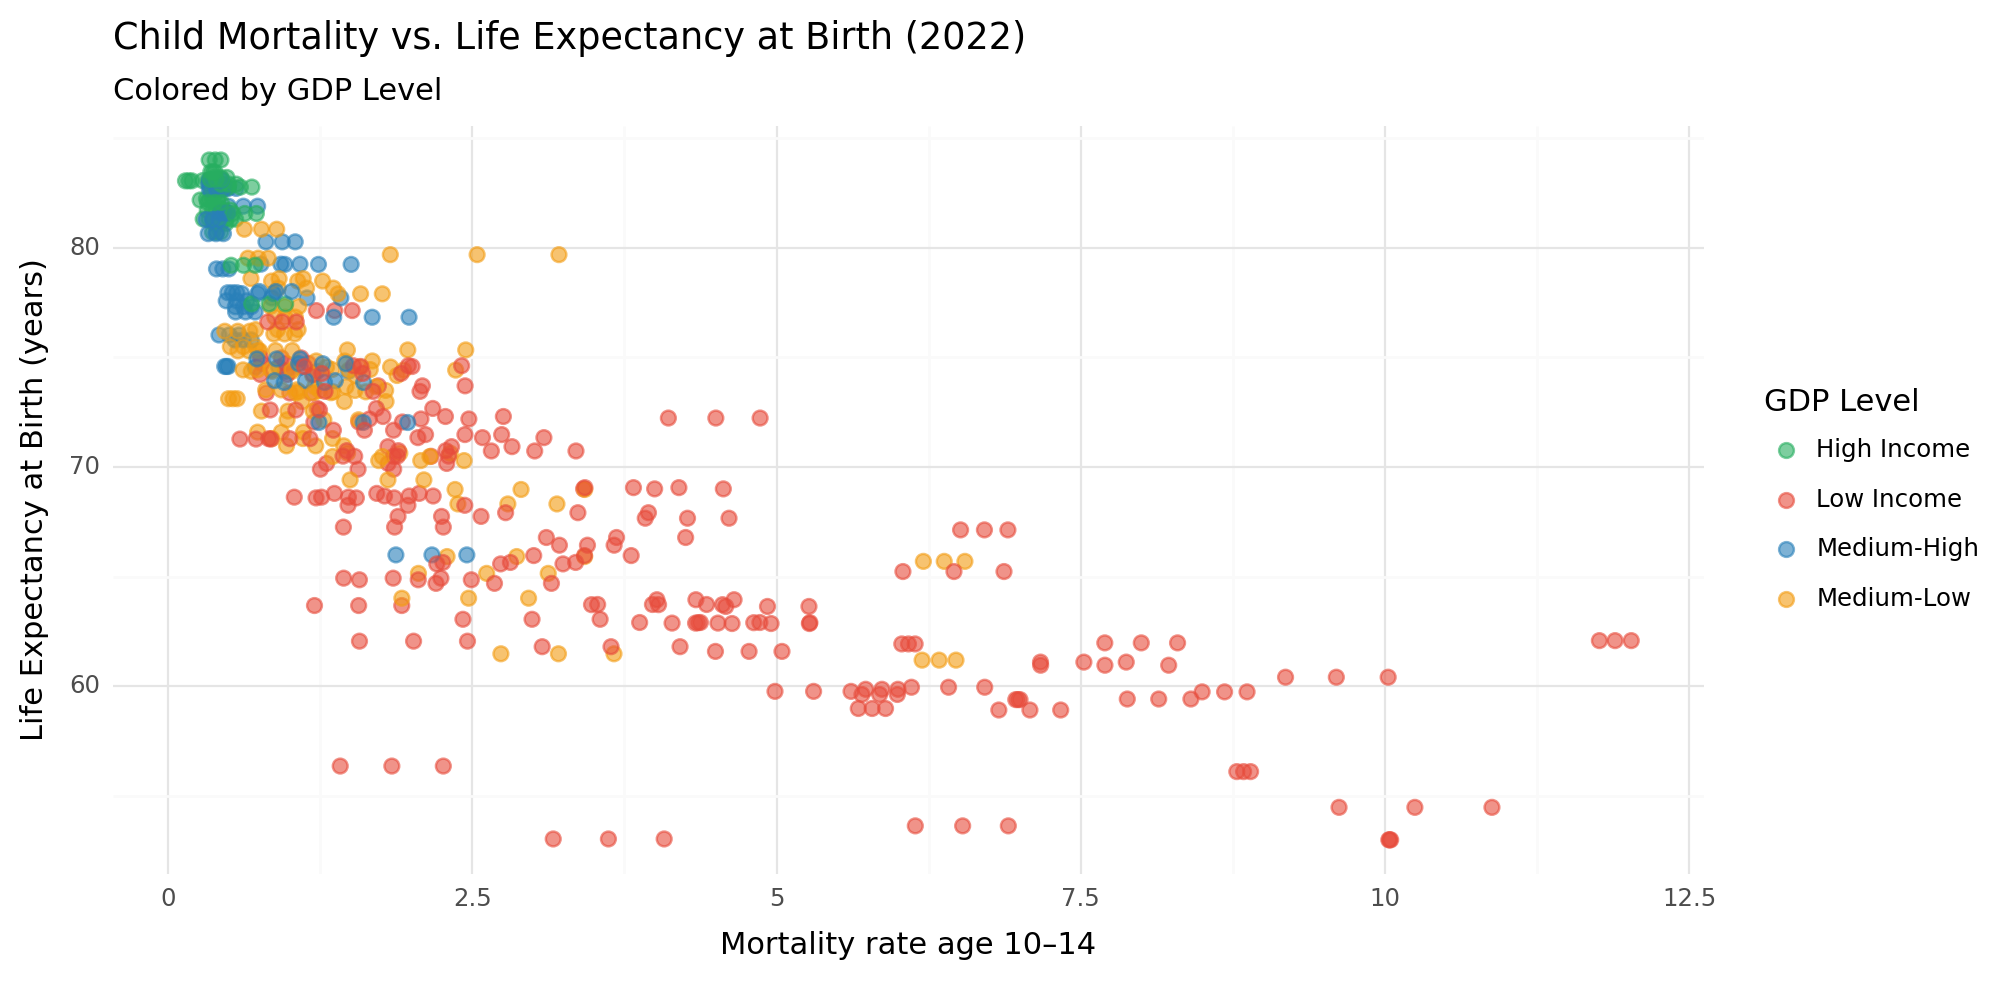

<Figure Size: (1000 x 500)>

In [ ]:
from plotnine import *

(
    ggplot(merged, aes(x='obs_value', y='life_expectancy', color='GDP Level')) +
    geom_point(alpha=0.6, size=2.5) +
    scale_color_manual(values={
        "Low Income": "#e74c3c",
        "Medium-Low": "#f39c12",
        "Medium-High": "#2980b9",
        "High Income": "#27ae60"
    }) +
    labs(
        title="Child Mortality vs. Life Expectancy at Birth (2022)",
        subtitle="Colored by GDP Level",
        x="Mortality rate age 10–14",
        y="Life Expectancy at Birth (years)",
        color="GDP Level"
    ) +
    theme_minimal() +
    theme(figure_size=(10, 5))
)


In [ ]:
from plotnine import *
import matplotlib.pyplot as plt

# Create the plot
plot = (
    ggplot(merged, aes(x='obs_value', y='life_expectancy', color='GDP Level')) +
    geom_point(alpha=0.6, size=2.5) +
    scale_color_manual(values={
        "Low Income": "#e74c3c",
        "Medium-Low": "#f39c12",
        "Medium-High": "#2980b9",
        "High Income": "#27ae60"
    }) +
    labs(
        title="Child Mortality vs. Life Expectancy at Birth (2022)",
        subtitle="Colored by GDP Level",
        x="Mortality rate age 10–14",
        y="Life Expectancy at Birth (years)",
        color="GDP Level"
    ) +
    theme_minimal() +
    theme(figure_size=(10, 5))
)

# Save the plot to a PNG file
plot_filename = "child_mortality_life_expectancy.png"
plot.save(plot_filename, dpi=300)

# To download the file in Colab
from google.colab import files
files.download(plot_filename)


/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 10 x 5 in image.
/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: child_mortality_life_expectancy.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip uninstall -y plotnine mizani

Found existing installation: plotnine 0.12.3
Uninstalling plotnine-0.12.3:
  Successfully uninstalled plotnine-0.12.3
Found existing installation: mizani 0.9.3
Uninstalling mizani-0.9.3:
  Successfully uninstalled mizani-0.9.3


In [ ]:
!pip install plotnine==0.12.3 mizani==0.9.3 --no-cache-dir

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.7/73.7 kB 254.9 MB/s eta 0:00:00


In [ ]:
!pip install plotnine==0.10.1 mizani==0.8.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 18.8 MB/s eta 0:00:00
  Attempting uninstall: mizani
    Found existing installation: mizani 0.9.3
    Uninstalling mizani-0.9.3:
      Successfully uninstalled mizani-0.9.3
  Attempting uninstall: plotnine
    Found existing installation: plotnine 0.12.3
    Uninstalling plotnine-0.12.3:
      Successfully uninstalled plotnine-0.12.3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from plotnine import *

In [ ]:
meta = pd.read_csv("/content/drive/MyDrive/UNICEF_Storytelling_Project/unicef_metadata.csv")
df = pd.read_csv("/content/drive/MyDrive/UNICEF_Storytelling_Project/unicef_indicator_2 .csv")

In [ ]:
df_filtered = df[(df['time_period'] >= 1990) & (df['time_period'] <= 2022) & df['obs_value'].notna()]
meta_filtered = meta[(meta['year'] >= 1990) & (meta['year'] <= 2022) & meta['Fossil fuel energy consumption (% of total)'].notna()]


In [ ]:
child_mortality = df_filtered.groupby('alpha_3_code')['obs_value'].mean().reset_index()
child_mortality.rename(columns={'obs_value': 'mean_child_mortality'}, inplace=True)

fossil_fuel = meta_filtered.groupby('alpha_3_code')['Fossil fuel energy consumption (% of total)'].mean().reset_index()
fossil_fuel.rename(columns={'Fossil fuel energy consumption (% of total)': 'mean_fossil_fuel'}, inplace=True)


In [ ]:
merged = pd.merge(child_mortality, fossil_fuel, on='alpha_3_code', how='inner')


In [ ]:
merged['Legend'] = 'Countries'

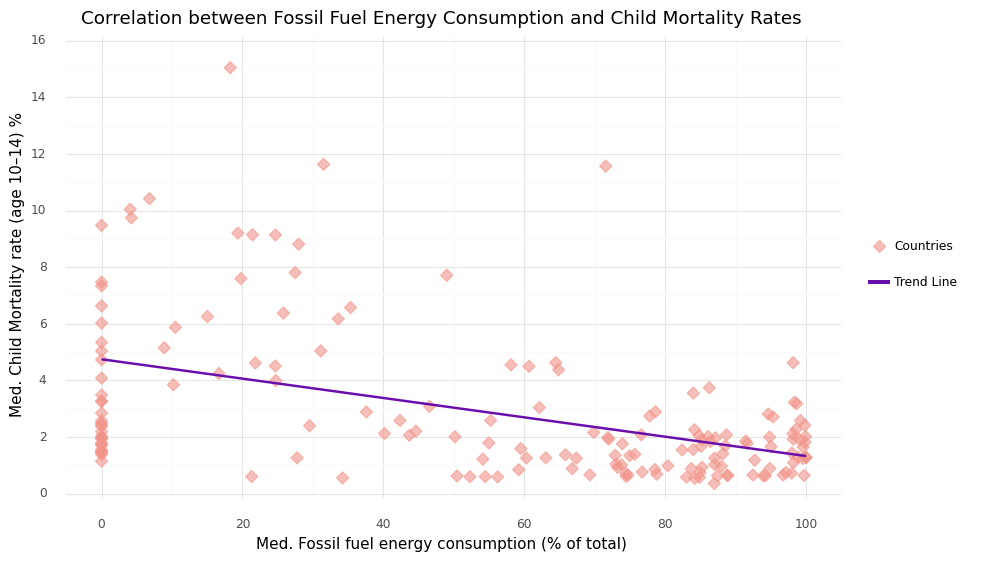

<ggplot: (8543476575453)>

In [ ]:
plot = (
    ggplot(merged, aes(x='mean_fossil_fuel', y='mean_child_mortality')) +

    # Diamond pastel red points labeled as "Countries"
    geom_point(aes(shape='Legend', color='Legend'), size=3, alpha=0.6) +

    # Add the regression line, labeled as "Trend Line"
    geom_smooth(aes(linetype='Legend'), data=merged.assign(Legend='Trend Line'),
                method='lm', se=False, color='#6a0dad') +

    # Manual legend styling
    scale_shape_manual(values={'Countries': 'D'}) +
    scale_color_manual(values={'Countries': '#f1948a'}) +
    scale_linetype_manual(values={'Trend Line': 'solid'}) +

    # Adjusted x and y axis scales
    scale_x_continuous(
        name="Med. Fossil fuel energy consumption (% of total)",
        breaks=[0, 20, 40, 60, 80, 100],
        expand=(0.05, 0)
    ) +
    scale_y_continuous(
    name="Med. Child Mortality rate (age 10–14) %",
    breaks=[0, 2, 4, 6, 8, 10, 12, 14, 16],
    limits=(0, 16),
    expand=(0.01, 0)
) +

    # Title and theme
    labs(
        title="Correlation between Fossil Fuel Energy Consumption and Child Mortality Rates",
        shape='',
        color='',
        linetype=''
    ) +

    theme_minimal() +
    theme(
        figure_size=(10, 6),
        legend_title=element_blank(),
        legend_position='right'
    )
)

plot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1000x600 with 0 Axes>

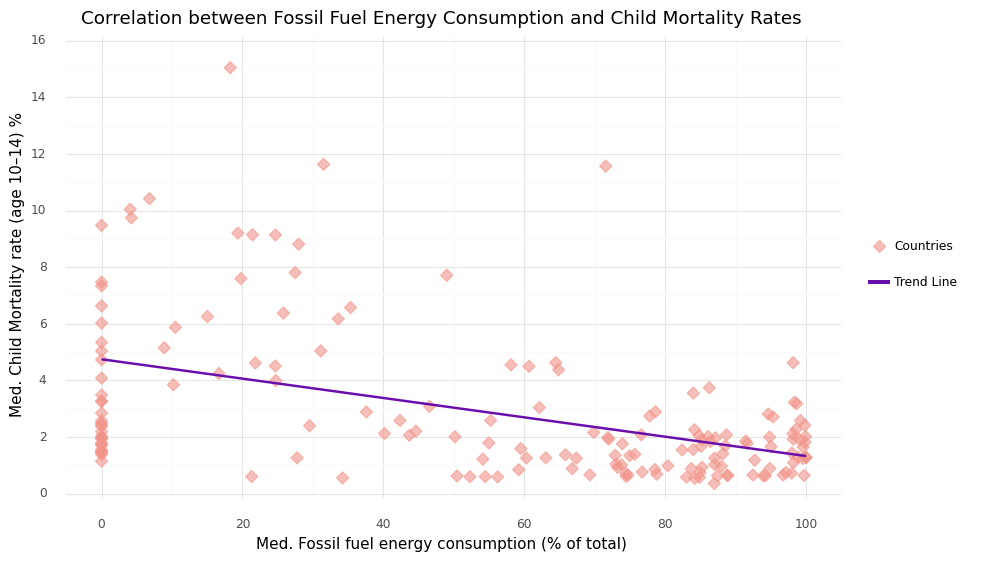

In [15]:
from plotnine import *
import matplotlib.pyplot as plt

# Create the plot
plot = (
    ggplot(merged, aes(x='mean_fossil_fuel', y='mean_child_mortality')) +

    # Diamond pastel red points labeled as "Countries"
    geom_point(aes(shape='Legend', color='Legend'), size=3, alpha=0.6) +

    # Add the regression line, labeled as "Trend Line"
    geom_smooth(aes(linetype='Legend'), data=merged.assign(Legend='Trend Line'),
                method='lm', se=False, color='#6a0dad') +

    # Manual legend styling
    scale_shape_manual(values={'Countries': 'D'}) +
    scale_color_manual(values={'Countries': '#f1948a'}) +
    scale_linetype_manual(values={'Trend Line': 'solid'}) +

    # Adjusted x and y axis scales
    scale_x_continuous(
        name="Med. Fossil fuel energy consumption (% of total)",
        breaks=[0, 20, 40, 60, 80, 100],
        expand=(0.05, 0)
    ) +
    scale_y_continuous(
        name="Med. Child Mortality rate (age 10–14) %",
        breaks=[0, 2, 4, 6, 8, 10, 12, 14, 16],
        limits=(0, 16),
        expand=(0.01, 0)
    ) +

    # Title and theme
    labs(
        title="Correlation between Fossil Fuel Energy Consumption and Child Mortality Rates",
        shape='',
        color='',
        linetype=''
    ) +

    theme_minimal() +
    theme(
        figure_size=(10, 6),
        legend_title=element_blank(),
        legend_position='right'
    )
)

# Save the plot as a PNG image
plt.figure(figsize=(10,6))
plot.draw()  # Render the plot with plotnine
plt.savefig('fossil_fuel_child_mortality_plot.png', dpi=300)  # Save the figure

# To download the file in Google Colab
from google.colab import files
files.download('fossil_fuel_child_mortality_plot.png')


In [ ]:
!pip install plotnine

In [ ]:
import pandas as pd
from plotnine import *

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/UNICEF_Storytelling_Project/unicef_metadata.csv")

In [ ]:
region_map = {
    "East Asia and Pacific": ["American Samoa", "Australia", "Plurinational State of", "Brunei", "Cambodia", "China", "Fiji",
        "French Polynesia", "Guam", "Hong Kong", "Indonesia", "Japan", "Kiribati",
        "Korea, Democratic People's Republic of", "Lao People's Democratic Republic", "Macao", "Malaysia",
        "Marshall Islands", "Micronesia, Federated States of", "Mongolia", "Myanmar", "Nauru", "New Caledonia",
        "New Zealand", "Northern Mariana Islands", "Palau", "Papua New Guinea", "Philippines", "Samoa",
        "Singapore", "Solomon Islands", "South Korea", "Thailand", "Timor-Leste", "Tonga", "Tuvalu", "Vanuatu", "Vietnam"],
    "Europe and Central Asia": ["Albania", "Andorra", "Armenia", "Austria", "Azerbaijan", "Belarus", "Belgium", "Bosnia and Herzegovina",
        "Bulgaria", "Croatia", "Cyprus", "Czech Republic", "Denmark", "Estonia", "Faroe Islands", "Finland", "France",
        "Georgia", "Germany", "Gibraltar", "Greece", "Greenland", "Hungary", "Iceland", "Ireland", "Isle of Man",
        "Italy", "Kazakhstan", "Kyrgyzstan", "Latvia", "Liechtenstein", "Lithuania", "Luxembourg",
        "Macedonia, the former Yugoslav Republic of", "Monaco", "Moldova, Republic of", "Montenegro", "Netherlands",
        "Norway", "Poland", "Portugal", "Romania", "Russian Federation", "San Marino", "Serbia", "Slovakia", "Slovenia",
        "Spain", "Sweden", "Switzerland", "Tajikistan", "Turkey", "Turkmenistan", "Ukraine", "United Kingdom", "Uzbekistan"],
    "Latin America and the Caribbean": ["Antigua and Barbuda", "Argentina", "Aruba", "Bahamas", "Barbados", "Belize", "Bolivia", "Brazil",
        "Cayman Islands", "Chile", "Colombia", "Costa Rica", "Cuba", "Dominica", "Dominican Republic", "Ecuador",
        "El Salvador", "Grenada", "Guatemala", "Guyana", "Haiti", "Honduras", "Jamaica", "Mexico", "Nicaragua", "Panama",
        "Paraguay", "Peru", "Puerto Rico", "Saint Kitts and Nevis", "Saint Lucia", "St. Vincent and the Grenadines",
        "Suriname", "Trinidad and Tobago", "Turks and Caicos Islands", "Venezuela, Bolivarian Republic of",
        "Virgin Islands, British", "Virgin Islands, U.S.", "Uruguay"],
    "Middle East and North Africa": ["Algeria", "Bahrain", "Djibouti", "Egypt", "Iran, Islamic Republic of", "Iraq", "Israel", "Jordan", "Kuwait",
        "Lebanon", "Libyan Arab Jamahiriya", "Malta", "Morocco", "Oman", "Palestinian Territory, Occupied", "Qatar",
        "Saudi Arabia", "Syrian Arab Republic", "Tunisia", "United Arab Emirates", "Yemen"],
    "North America": ["Bermuda", "Canada", "United States"],
    "South Asia": ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"],
    "Sub-Saharan Africa": ["Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cameroon", "Cape Verde", "Central African Republic",
        "Chad", "Comoros", "Congo", "Congo, the Democratic Republic of the", "Equatorial Guinea", "Eritrea", "Ethiopia",
        "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Ivory Coast", "Kenya", "Lesotho", "Liberia",
        "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Mozambique", "Niger", "Nigeria", "Rwanda",
        "Sao Tome and Principe", "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa", "South Sudan",
        "Sudan", "Swaziland", "Tanzania, United Republic of", "Togo", "Uganda", "Zambia", "Zimbabwe"]
}


In [ ]:
country_to_region = {country: region for region, countries in region_map.items() for country in countries}
df['region'] = df['country'].map(country_to_region)


In [ ]:
df_filtered = df[(df['year'] >= 1990) & (df['year'] <= 2022)]


In [ ]:
df_filtered = df_filtered.dropna(subset=["GDP per capita (constant 2015 US$)", "Fossil fuel energy consumption (% of total)", "region"])


In [ ]:
region_avg = df_filtered.groupby("region")[["GDP per capita (constant 2015 US$)", "Fossil fuel energy consumption (% of total)"]].mean().reset_index()


In [ ]:
region_avg.rename(columns={
    "GDP per capita (constant 2015 US$)": "GDP_per_capita",
    "Fossil fuel energy consumption (% of total)": "Fossil_fuel_pct"
}, inplace=True)


In [ ]:
region_avg_sorted = region_avg.sort_values("GDP_per_capita")

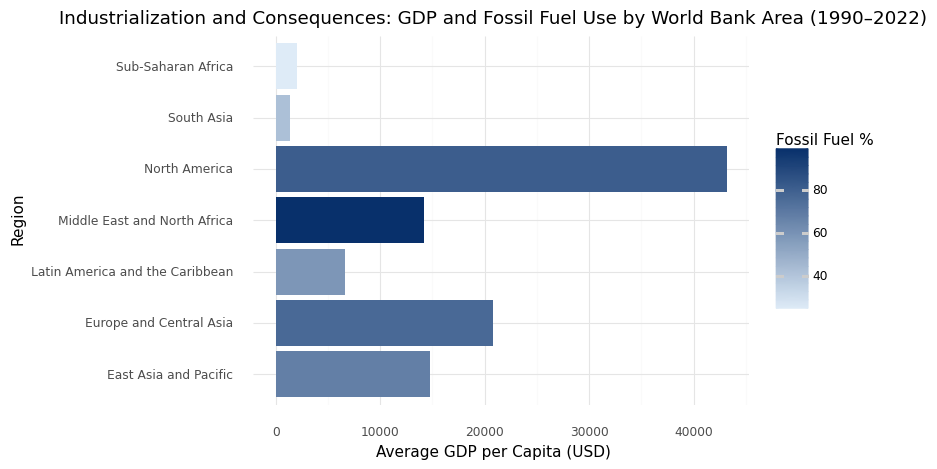

In [ ]:
p = (
    ggplot(region_avg_sorted, aes(x="region", y="GDP_per_capita", fill="Fossil_fuel_pct")) +
    geom_col() +
    coord_flip() +  # This is key to avoiding the 'trans' bug and achieving horizontal layout
    scale_fill_gradient(low="#deebf7", high="#08306b") +
    labs(
        title="Industrialization and Consequences: GDP and Fossil Fuel Use by World Bank Area (1990–2022)",
        x="Region",
        y="Average GDP per Capita (USD)",
        fill="Fossil Fuel %"
    ) +
    theme_minimal()
)

print(p)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/UNICEF_Storytelling_Project/Regional_Averages__1990_2022_.csv")


In [ ]:
import pandas as pd
from plotnine import *

In [ ]:
df.columns = ['region', 'GDP_per_capita', 'Fossil_fuel_pct']


In [ ]:
df_sorted = df.sort_values("GDP_per_capita")


In [ ]:
df_sorted['region'] = pd.Categorical(df_sorted['region'], categories=df_sorted.sort_values('GDP_per_capita')['region'], ordered=True)

In [ ]:
max_gdp = df_sorted['GDP_per_capita'].max()


In [ ]:
p = (
    ggplot(df_sorted, aes(x="region", y="GDP_per_capita", fill="Fossil_fuel_pct")) +
    geom_col() +
    geom_text(
        aes(label=df_sorted['Fossil_fuel_pct'].round(0).astype(int).astype(str) + "%"),
        nudge_y=-4000, size=8, ha='right'
    ) +
    geom_text(
        aes(label=df_sorted['GDP_per_capita'].round(0).astype(int).astype(str) + " USD"),
        nudge_y=2000, size=8, ha='left'
    ) +
    coord_flip() +
    scale_fill_gradient(low="#deebf7", high="#08306b") +
    xlim(0, max_gdp + 10000) +
    labs(
        title="Industrialization and Consequences: GDP and Fossil Fuel Use by World Bank Area (1990–2022)",
        x="Region",
        y="Average GDP per Capita (USD)",
        fill="Fossil Fuel %"
    ) +
    theme_minimal() +
    theme(figure_size=(10, 6))
)

In [ ]:
import pandas as pd
from plotnine import *
from IPython.display import Image, display

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/UNICEF_Storytelling_Project/Regional_Averages__1990_2022_.csv")


In [ ]:
df.columns = ['region', 'GDP_per_capita', 'Fossil_fuel_pct']


In [ ]:
df['GDP_per_capita'] = pd.to_numeric(df['GDP_per_capita'], errors='coerce')
df['Fossil_fuel_pct'] = pd.to_numeric(df['Fossil_fuel_pct'], errors='coerce')


In [ ]:
df_sorted = df.sort_values("GDP_per_capita").copy()
df_sorted['region'] = pd.Categorical(df_sorted['region'], categories=df_sorted['region'], ordered=True)


In [ ]:
df_sorted['GDP_label'] = df_sorted['GDP_per_capita'].apply(lambda x: f"{int(round(x)):,} USD")
df_sorted['Fossil_label'] = df_sorted['Fossil_fuel_pct'].apply(lambda x: f"{int(round(x))}%")


In [ ]:
max_gdp = df_sorted['GDP_per_capita'].max()


In [ ]:
p = (
    ggplot(df_sorted, aes(x='region', y='GDP_per_capita', fill='Fossil_fuel_pct')) +
    geom_col() +
    geom_text(aes(label='Fossil_label'), nudge_y=-4000, size=8, ha='right') +
    geom_text(aes(label='GDP_label'), nudge_y=2000, size=8, ha='left') +
    coord_flip() +
    scale_fill_gradient(low="#deebf7", high="#08306b") +
    xlim(0, max_gdp + 10000) +
    labs(
        title="Industrialization and Consequences: GDP and Fossil Fuel Consumption by World Bank Area (1990–2022)",
        x="Region",
        y="Average GDP per Capita (USD)",
        fill="Fossil Fuel %"
    ) +
    theme_minimal() +
    theme(figure_size=(10, 6))
)

In [ ]:
from plotnine import *
import pandas as pd
from IPython.display import Image, display

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/UNICEF_Storytelling_Project/Regional_Averages__1990_2022_.csv")
df.columns = ['region', 'GDP_per_capita', 'Fossil_fuel_pct']
df['GDP_per_capita'] = pd.to_numeric(df['GDP_per_capita'], errors='coerce')
df['Fossil_fuel_pct'] = pd.to_numeric(df['Fossil_fuel_pct'], errors='coerce')


In [ ]:
df_sorted = df.sort_values("GDP_per_capita").copy()
df_sorted['region'] = pd.Categorical(df_sorted['region'], categories=df_sorted['region'], ordered=True)


In [ ]:
df_sorted['GDP_label'] = df_sorted['GDP_per_capita'].apply(lambda x: f"{int(round(x)):,} USD")
df_sorted['Fossil_label'] = df_sorted['Fossil_fuel_pct'].apply(lambda x: f"{int(round(x))}%")


In [ ]:
max_gdp = df_sorted['GDP_per_capita'].max()


In [ ]:
df_sorted['GDP_per_capita'] = pd.to_numeric(df_sorted['GDP_per_capita'], errors='coerce')
df_sorted['Fossil_fuel_pct'] = pd.to_numeric(df_sorted['Fossil_fuel_pct'], errors='coerce')


/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 9 x 5 in image.
/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: final_plot.png


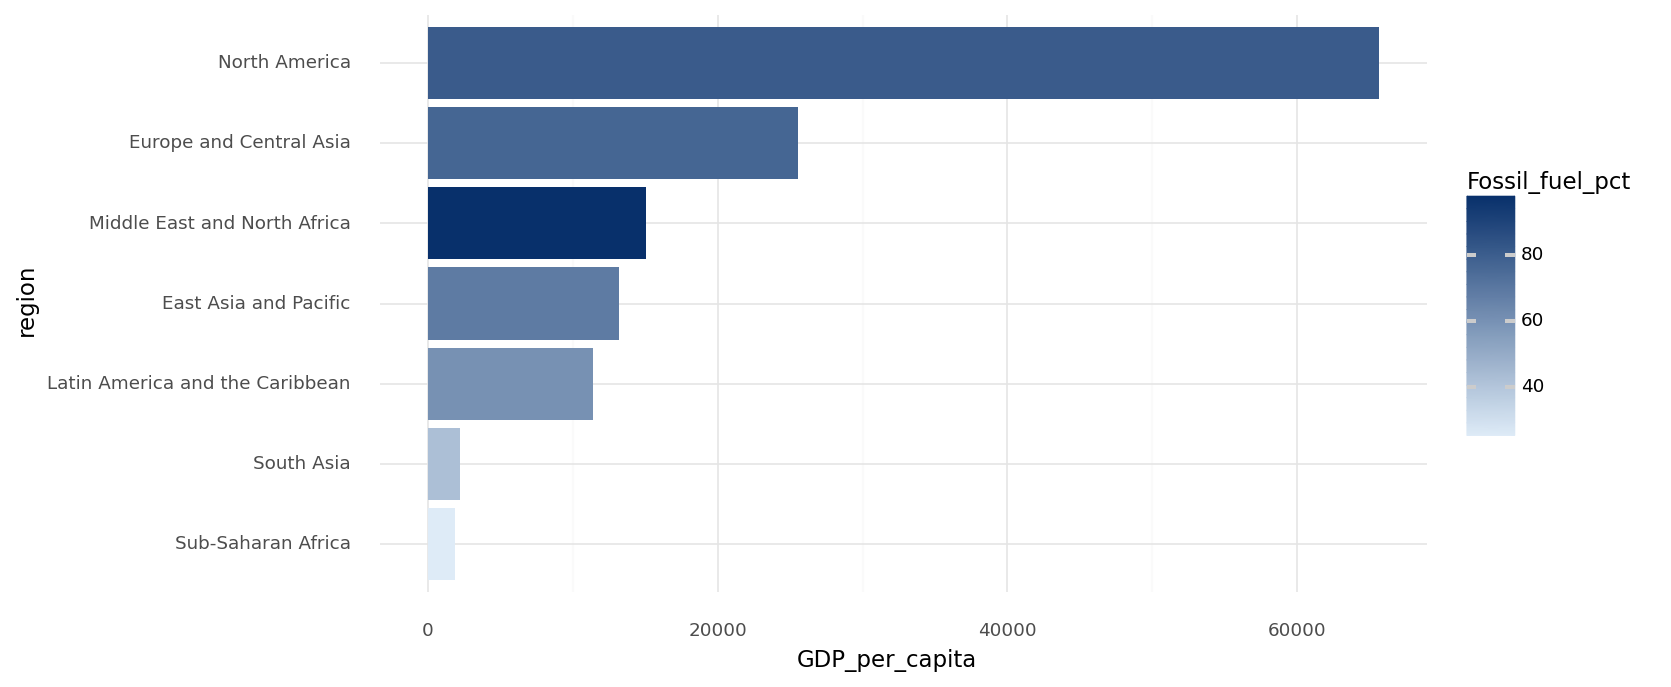

In [ ]:
from plotnine import *

p = (
    ggplot(df_sorted, aes(x='region', y='GDP_per_capita', fill='Fossil_fuel_pct')) +
    geom_col() +
    coord_flip() +
    scale_fill_gradient(low="#deebf7", high="#08306b") +
    theme_minimal() +
    theme(figure_size=(9, 5))
)

p.save("final_plot.png", dpi=150)

from IPython.display import Image, display
display(Image("final_plot.png"))

In [ ]:
p = (
    ggplot(df_sorted, aes(x='region', y='GDP_per_capita', fill='Fossil_fuel_pct')) +
    geom_col() +
    geom_text(aes(label='Fossil_label'), nudge_y=-4000, size=8, ha='right') +
    geom_text(aes(label='GDP_label'), nudge_y=2000, size=8, ha='left') +
    coord_flip() +
    scale_fill_gradient(low="#deebf7", high="#08306b") +
    xlim(0, df_sorted['GDP_per_capita'].max() + 10000) +
    labs(
        title="Industrialization and Consequences: GDP and Fossil Fuel Consumption by World Bank Area (1990–2022)",
        x="Region",
        y="Average GDP per Capita (USD)",
        fill="Fossil Fuel %"
    ) +
    theme_minimal() +
    theme(figure_size=(9, 5))
)


In [ ]:
df_sorted['GDP_per_capita'] = pd.to_numeric(df_sorted['GDP_per_capita'], errors='coerce')
df_sorted['Fossil_fuel_pct'] = pd.to_numeric(df_sorted['Fossil_fuel_pct'], errors='coerce')


In [ ]:
print(df_sorted.dtypes)

region             category
GDP_per_capita      float64
Fossil_fuel_pct     float64
GDP_label            object
Fossil_label         object
dtype: object


/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 9 x 5 in image.
/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: final_plot.png
/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:411: PlotnineWarning: geom_text : Removed 2 rows containing missing values.


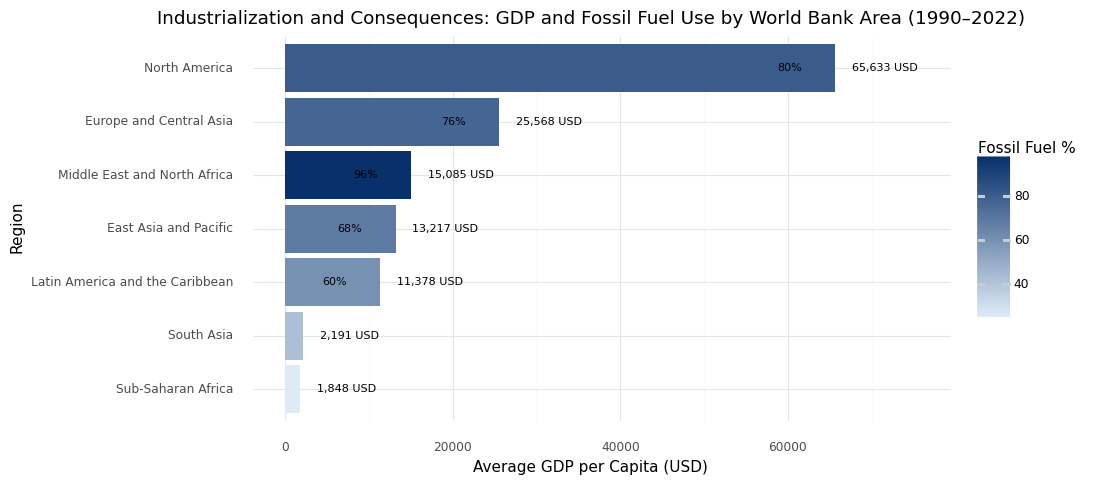

In [ ]:
from plotnine import *
from IPython.display import Image, display

max_gdp = df_sorted['GDP_per_capita'].max()

p = (
    ggplot(df_sorted, aes(x='region', y='GDP_per_capita', fill='Fossil_fuel_pct')) +
    geom_col() +
    geom_text(aes(label='Fossil_label'), nudge_y=-4000, size=8, ha='right') +
    geom_text(aes(label='GDP_label'), nudge_y=2000, size=8, ha='left') +
    coord_flip() +
    scale_fill_gradient(low="#deebf7", high="#08306b") +
    ylim(0, max_gdp + 10000) +  # Use ylim instead of xlim due to coord_flip()
    labs(
        title="Industrialization and Consequences: GDP and Fossil Fuel Use by World Bank Area (1990–2022)",
        x="Region",
        y="Average GDP per Capita (USD)",
        fill="Fossil Fuel %"
    ) +
    theme_minimal() +
    theme(figure_size=(9, 5))
)

p.save("final_plot.png", dpi=100)
display(Image("final_plot.png"))


In [ ]:
from plotnine import *
from IPython.display import Image, display
import matplotlib.pyplot as plt
from google.colab import files  # Ensure this is correctly imported

# Get max GDP for the y-axis limit
max_gdp = df_sorted['GDP_per_capita'].max()

# Create the plot
p = (
    ggplot(df_sorted, aes(x='region', y='GDP_per_capita', fill='Fossil_fuel_pct')) +
    geom_col() +
    geom_text(aes(label='Fossil_label'), nudge_y=-4000, size=8, ha='right') +
    geom_text(aes(label='GDP_label'), nudge_y=2000, size=8, ha='left') +
    coord_flip() +
    scale_fill_gradient(low="#deebf7", high="#08306b") +
    ylim(0, max_gdp + 10000) +  # Use ylim instead of xlim due to coord_flip()
    labs(
        title="Industrialization and Consequences: GDP and Fossil Fuel Use by World Bank Area (1990–2022)",
        x="Region",
        y="Average GDP per Capita (USD)",
        fill="Fossil Fuel %"
    ) +
    theme_minimal() +
    theme(figure_size=(9, 5))
)

# Save the plot as a PNG image
plt.figure(figsize=(9, 5))
p.draw()  # Render the plot with plotnine
plt.savefig('final_plot.png', dpi=100)  # Save the figure as a PNG

# To display the saved plot within the notebook
display(Image('final_plot.png'))

# To download the file in Google Colab
files.download('final_plot.png')


In [ ]:
!pip install plotnine==0.10.1 mizani==0.9.3 --quiet


In [ ]:
import pandas as pd
import numpy as np
from plotnine import *

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/UNICEF_Storytelling_Project/unicef_metadata.csv")

In [ ]:
df_clean = df[['year', 'GDP per capita (constant 2015 US$)', 'Life expectancy at birth, total (years)']].dropna()


In [ ]:
df_decade = df_clean[(df_clean['year'] >= 2002) & (df_clean['year'] <= 2022)]



In [ ]:
df_grouped = df_decade.groupby('year', as_index=False).mean()



In [ ]:
df_grouped['Rescaled_Life_Expectancy'] = df_grouped['Life expectancy at birth, total (years)'] * 500


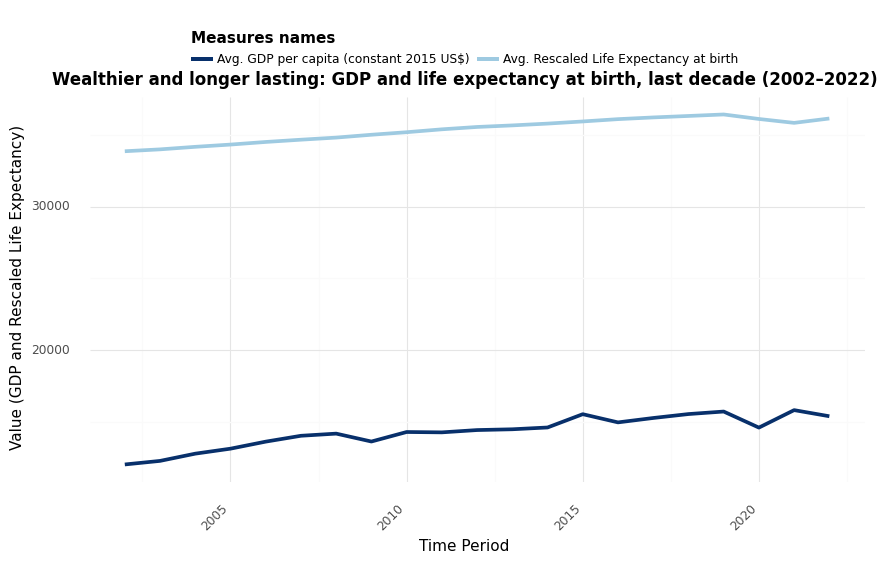

In [ ]:
p = (
    ggplot(df_grouped, aes(x='year')) +
    geom_line(aes(y='GDP per capita (constant 2015 US$)', color='"Avg. GDP per capita (constant 2015 US$)"'), size=1.5) +
    geom_line(aes(y='Rescaled_Life_Expectancy', color='"Avg. Rescaled Life Expectancy at birth"'), size=1.5) +
    scale_color_manual(
        values={
            "Avg. GDP per capita (constant 2015 US$)": "#08306b",
            "Avg. Rescaled Life Expectancy at birth": "#9ecae1"
        },
        name="Measures names"
    ) +
    labs(
        title="Wealthier and longer lasting: GDP and life expectancy at birth, last decade (2002–2022)",
        x="Time Period",
        y="Value (GDP and Rescaled Life Expectancy)"
    ) +
    theme_minimal() +
    theme(
        figure_size=(10, 5),
        axis_text_x=element_text(rotation=45, hjust=1),
        legend_position='top',
        legend_title=element_text(weight='bold'),
        plot_title=element_text(weight='bold', size=12)
    )
)

print(p)

In [ ]:
df_grouped = df_decade.groupby('year', as_index=False).mean()


In [ ]:
df_grouped['Rescaled_Life_Expectancy'] = df_grouped['Life expectancy at birth, total (years)'] * 200


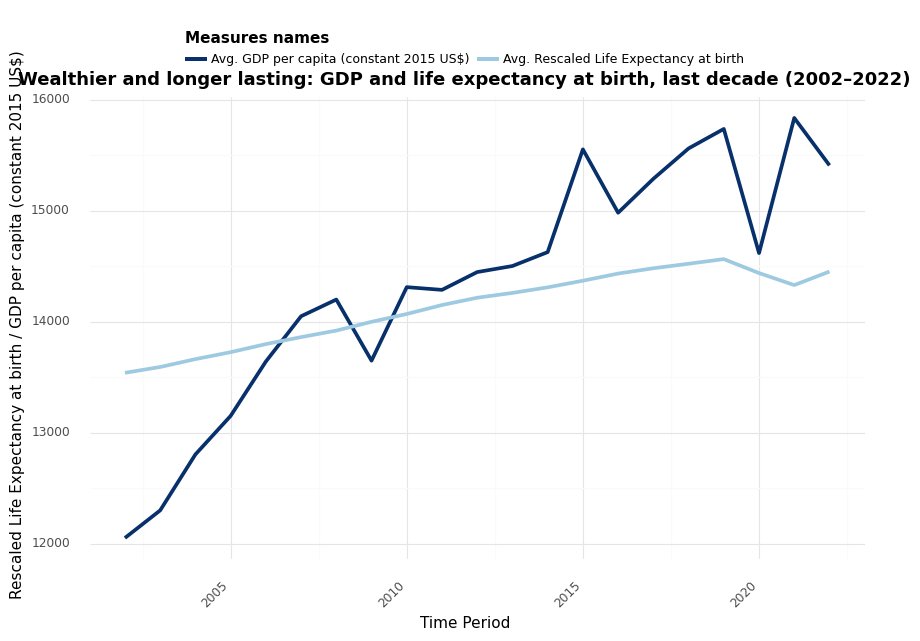

In [ ]:
p = (
    ggplot(df_grouped, aes(x='year')) +
    geom_line(aes(y='GDP per capita (constant 2015 US$)', color='"Avg. GDP per capita (constant 2015 US$)"'), size=1.5) +
    geom_line(aes(y='Rescaled_Life_Expectancy', color='"Avg. Rescaled Life Expectancy at birth"'), size=1.5) +
    scale_color_manual(
        values={
            "Avg. GDP per capita (constant 2015 US$)": "#08306b",
            "Avg. Rescaled Life Expectancy at birth": "#9ecae1"
        },
        name="Measures names"
    ) +
    labs(
        title="Wealthier and longer lasting: GDP and life expectancy at birth, last decade (2002–2022)",
        x="Time Period",
        y="Rescaled Life Expectancy at birth / GDP per capita (constant 2015 US$)"
    ) +
    theme_minimal() +
    theme(
        figure_size=(10, 6),  # Slightly wider than before
        axis_text_x=element_text(rotation=45, hjust=1),
        legend_position='top',
        legend_title=element_text(weight='bold'),
        legend_text=element_text(size=9),  # Helps fit long legend labels
        plot_title=element_text(weight='bold', size=13)
    )
)

print(p)

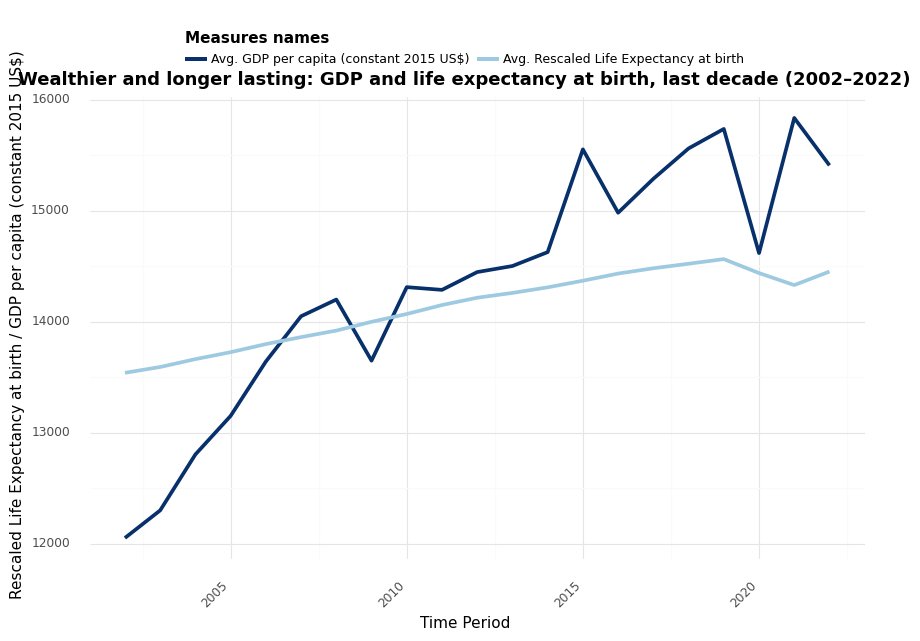

<ggplot: (8543471794381)>

In [ ]:
from plotnine import ggplot
from IPython.display import display

display(p)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1000x600 with 0 Axes>

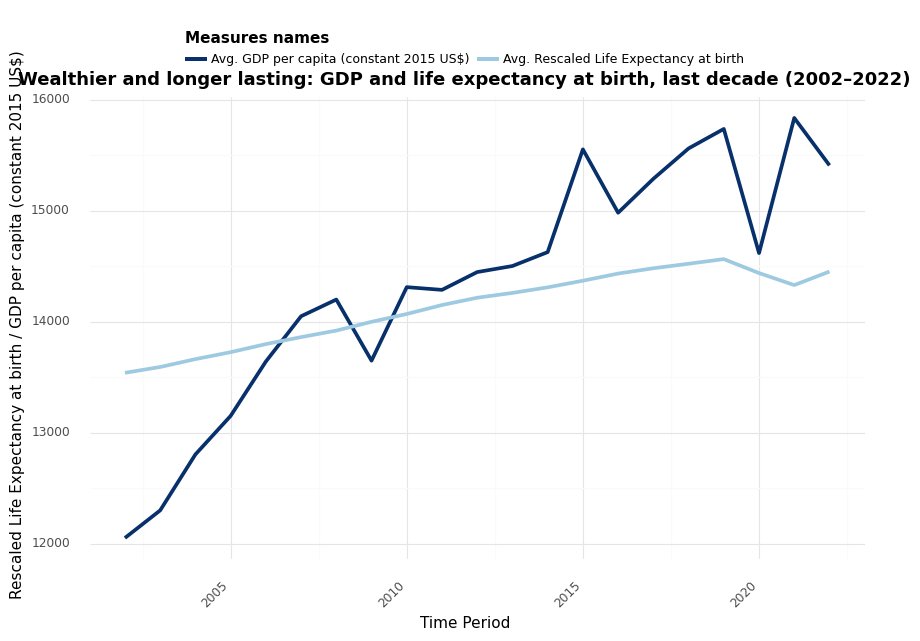

In [ ]:
from plotnine import *
import matplotlib.pyplot as plt
from google.colab import files

# Assuming df_grouped is already defined and contains the necessary data

# Create the plot
p = (
    ggplot(df_grouped, aes(x='year')) +
    geom_line(aes(y='GDP per capita (constant 2015 US$)', color='"Avg. GDP per capita (constant 2015 US$)"'), size=1.5) +
    geom_line(aes(y='Rescaled_Life_Expectancy', color='"Avg. Rescaled Life Expectancy at birth"'), size=1.5) +
    scale_color_manual(
        values={
            "Avg. GDP per capita (constant 2015 US$)": "#08306b",
            "Avg. Rescaled Life Expectancy at birth": "#9ecae1"
        },
        name="Measures names"
    ) +
    labs(
        title="Wealthier and longer lasting: GDP and life expectancy at birth, last decade (2002–2022)",
        x="Time Period",
        y="Rescaled Life Expectancy at birth / GDP per capita (constant 2015 US$)"
    ) +
    theme_minimal() +
    theme(
        figure_size=(10, 6),  # Slightly wider than before
        axis_text_x=element_text(rotation=45, hjust=1),
        legend_position='top',
        legend_title=element_text(weight='bold'),
        legend_text=element_text(size=9),  # Helps fit long legend labels
        plot_title=element_text(weight='bold', size=13)
    )
)

# Save the plot as a PNG image
plt.figure(figsize=(10, 6))
p.draw()  # Render the plot with plotnine
plt.savefig('GDP_Life_Expectancy_Plot.png', dpi=300)  # Save the figure as a PNG file

# To download the file in Google Colab
files.download('GDP_Life_Expectancy_Plot.png')


In [ ]:
!pip install -U plotnine mizani

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 kB 8.8 MB/s eta 0:00:00
  Attempting uninstall: mizani
    Found existing installation: mizani 0.9.3
    Uninstalling mizani-0.9.3:
      Successfully uninstalled mizani-0.9.3
  Attempting uninstall: plotnine
    Found existing installation: plotnine 0.10.1
    Uninstalling plotnine-0.10.1:
      Successfully uninstalled plotnine-0.10.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from plotnine import *
from IPython.display import display, Image

In [ ]:
!pip install --upgrade plotnine mizani

In [ ]:
!pip install plotnine==0.10.1 mizani==0.9.2

  Using cached plotnine-0.10.1-py3-none-any.whl.metadata (7.3 kB)
Using cached plotnine-0.10.1-py3-none-any.whl (1.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.7/73.7 kB 1.7 MB/s eta 0:00:00
  Attempting uninstall: mizani
    Found existing installation: mizani 0.13.3
    Uninstalling mizani-0.13.3:
      Successfully uninstalled mizani-0.13.3
  Attempting uninstall: plotnine
    Found existing installation: plotnine 0.14.5
    Uninstalling plotnine-0.14.5:
      Successfully uninstalled plotnine-0.14.5


In [ ]:
# Import necessary libraries
import pandas as pd

# Load the data
df_meta = pd.read_csv("/content/drive/MyDrive/UNICEF_Storytelling_Project/unicef_metadata.csv")
df_indicator = pd.read_csv("/content/drive/MyDrive/UNICEF_Storytelling_Project/unicef_indicator_2 .csv")

common_countries = set(df_meta['alpha_3_code']).intersection(df_indicator['alpha_3_code'])

# Filter data from 1990 to 2022 and remove rows with null values
df_meta = df_meta[['alpha_3_code', 'year', 'Hospital beds (per 1,000 people)', 'GDP per capita (constant 2015 US$)']].dropna()
df_meta = df_meta[(df_meta['year'] >= 1990) & (df_meta['year'] <= 2022)]

# Classify income levels based on GDP per capita
def classify_income(gdp):
    if gdp < 5000:
        return 'Low Income (<5K)'
    elif gdp < 15000:
        return 'Medium-Low (5K–14.9K)'
    elif gdp < 35000:
        return 'Medium-High (15K–34.9K)'
    else:
        return 'High Income (≥35K)'

# Calculate GDP per country and classify income levels
gdp_by_country = df_meta.groupby('alpha_3_code')['GDP per capita (constant 2015 US$)'].mean().reset_index()
gdp_by_country['Income Level'] = gdp_by_country['GDP per capita (constant 2015 US$)'].apply(classify_income)

# Merge income levels into the meta dataset
df_meta = df_meta.merge(gdp_by_country[['alpha_3_code', 'Income Level']], on='alpha_3_code')

# Aggregate data for Hospital beds per income level
hospital_beds_by_income = df_meta.groupby('Income Level')['Hospital beds (per 1,000 people)'].mean().reset_index()

# Display the results to check the values
hospital_beds_by_income


,Income Level,"Hospital beds (per 1,000 people)"
0,High Income (≥35K),5.076401
1,Low Income (<5K),2.677891
2,Medium-High (15K–34.9K),4.839811
3,Medium-Low (5K–14.9K),4.327405


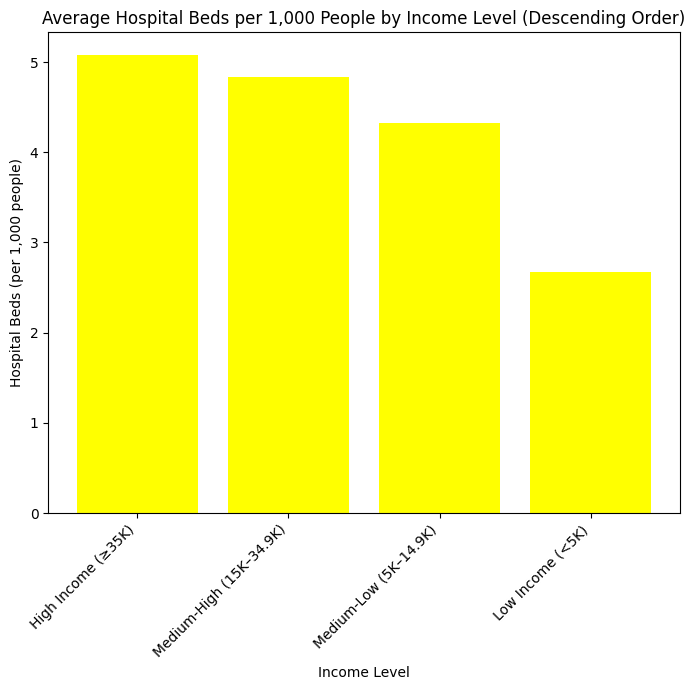

In [ ]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt

# Sort the data in descending order based on hospital beds
hospital_beds_by_income_sorted = hospital_beds_by_income.sort_values(by='Hospital beds (per 1,000 people)', ascending=False)

# Create the bar chart with the sorted data
plt.figure(figsize=(7, 7))
plt.bar(hospital_beds_by_income_sorted['Income Level'], hospital_beds_by_income_sorted['Hospital beds (per 1,000 people)'], color='yellow')

# Add labels and title
plt.xlabel('Income Level')
plt.ylabel('Hospital Beds (per 1,000 people)')
plt.title('Average Hospital Beds per 1,000 People by Income Level (Descending Order)')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # To make sure everything fits properly
plt.show()


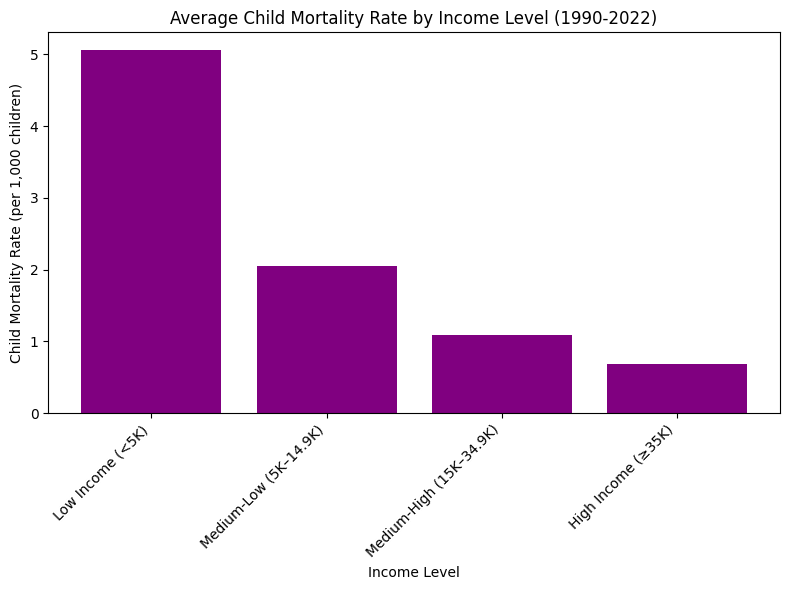

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df_meta = pd.read_csv("/content/drive/MyDrive/UNICEF_Storytelling_Project/unicef_metadata.csv")
df_indicator = pd.read_csv("/content/drive/MyDrive/UNICEF_Storytelling_Project/unicef_indicator_2 .csv")

# Strip any extra spaces in the column names
df_meta.columns = df_meta.columns.str.strip()
df_indicator.columns = df_indicator.columns.str.strip()

# Find common countries based on alpha_3_code
common_countries = set(df_meta['alpha_3_code']).intersection(df_indicator['alpha_3_code'])

# Filter data from 1990 to 2022 and remove rows with null values for hospital beds
df_meta = df_meta[['alpha_3_code', 'year', 'Hospital beds (per 1,000 people)', 'GDP per capita (constant 2015 US$)']].dropna()
df_meta = df_meta[(df_meta['year'] >= 1990) & (df_meta['year'] <= 2022)]
df_meta = df_meta[df_meta['alpha_3_code'].isin(common_countries)]

# Filter the indicator data from 1990 to 2022 and for common countries
df_indicator = df_indicator[['alpha_3_code', 'indicator', 'time_period', 'obs_value']].dropna()
df_indicator = df_indicator[df_indicator['alpha_3_code'].isin(common_countries)]
df_indicator = df_indicator[(df_indicator['time_period'] >= 1990) & (df_indicator['time_period'] <= 2022)]

# Classify income levels based on GDP per capita
def classify_income(gdp):
    if gdp < 5000:
        return 'Low Income (<5K)'
    elif gdp < 15000:
        return 'Medium-Low (5K–14.9K)'
    elif gdp < 35000:
        return 'Medium-High (15K–34.9K)'
    else:
        return 'High Income (≥35K)'

# Calculate GDP per country and classify income levels
gdp_by_country = df_meta.groupby('alpha_3_code')['GDP per capita (constant 2015 US$)'].mean().reset_index()
gdp_by_country['Income Level'] = gdp_by_country['GDP per capita (constant 2015 US$)'].apply(classify_income)

# Merge income levels into the meta dataset
df_meta = df_meta.merge(gdp_by_country[['alpha_3_code', 'Income Level']], on='alpha_3_code')

# Filter the rows where the indicator corresponds to child mortality
df_indicator_child_mortality = df_indicator[df_indicator['indicator'] == 'Mortality rate age 10-14']

# Calculate the average child mortality by income level
child_mortality_by_income = df_indicator_child_mortality.groupby('alpha_3_code')['obs_value'].mean().reset_index()

# Merge both hospital beds and child mortality into a single DataFrame
df_stacked_child_mortality = pd.merge(child_mortality_by_income, gdp_by_country[['alpha_3_code', 'Income Level']], on='alpha_3_code')

# Group by income level and calculate the mean child mortality for each income level
child_mortality_by_income_level = df_stacked_child_mortality.groupby('Income Level')['obs_value'].mean().reset_index()

child_mortality_by_income_level = child_mortality_by_income_level.sort_values(by='obs_value', ascending=False)


# Plot the bar chart for child mortality by income level
plt.figure(figsize=(8, 6))

# Plot child mortality rates in purple
plt.bar(child_mortality_by_income_level['Income Level'], child_mortality_by_income_level['obs_value'], color='purple')

# Add labels and title
plt.xlabel('Income Level')
plt.ylabel('Child Mortality Rate (per 1,000 children)')
plt.title('Average Child Mortality Rate by Income Level (1990-2022)')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # To make sure everything fits properly
plt.show()


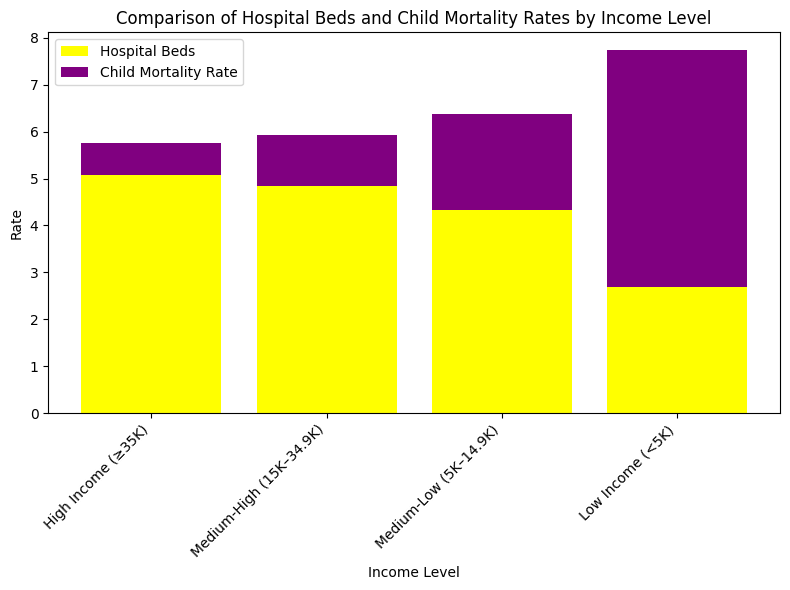

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the hospital_beds_by_income and child_mortality_by_income_level calculated

# Merge both hospital beds and child mortality data into a single DataFrame
df_stacked = pd.merge(hospital_beds_by_income, child_mortality_by_income_level, on='Income Level')

# Sort the data by hospital beds (already sorted)
df_stacked_sorted = df_stacked.sort_values(by='Hospital beds (per 1,000 people)', ascending=False)

# Create the stacked bar chart
plt.figure(figsize=(8, 6))

# Plot hospital beds in yellow
plt.bar(df_stacked_sorted['Income Level'], df_stacked_sorted['Hospital beds (per 1,000 people)'], color='yellow', label='Hospital Beds')

# Plot child mortality rates in purple, stacked under the hospital beds bars
plt.bar(df_stacked_sorted['Income Level'], df_stacked_sorted['obs_value'], color='purple', label='Child Mortality Rate', bottom=df_stacked_sorted['Hospital beds (per 1,000 people)'])

# Add labels and title
plt.xlabel('Income Level')
plt.ylabel('Rate')
plt.title('Comparison of Hospital Beds and Child Mortality Rates by Income Level')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()  # To make sure everything fits properly
plt.show()


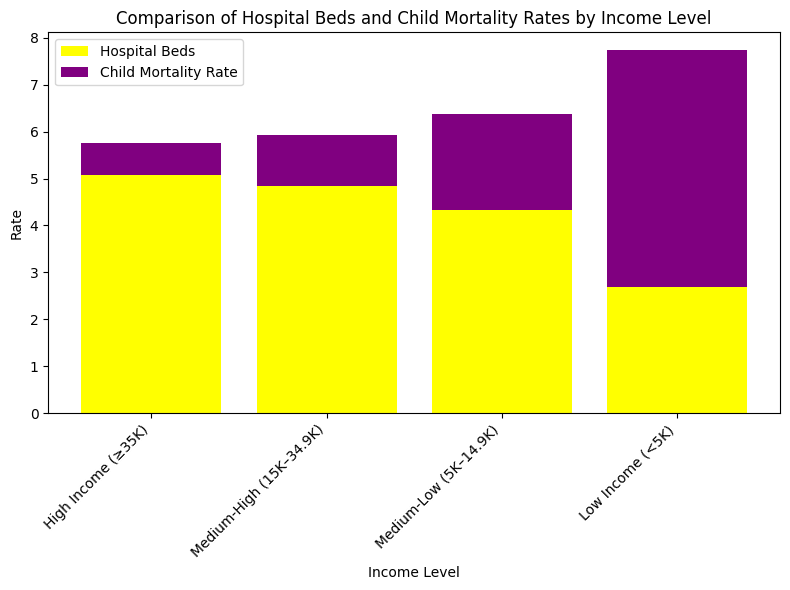

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the hospital_beds_by_income and child_mortality_by_income_level calculated

# Merge both hospital beds and child mortality data into a single DataFrame
df_stacked = pd.merge(hospital_beds_by_income, child_mortality_by_income_level, on='Income Level')

# Sort the data by hospital beds (already sorted)
df_stacked_sorted = df_stacked.sort_values(by='Hospital beds (per 1,000 people)', ascending=False)

# Create the stacked bar chart
plt.figure(figsize=(8, 6))

# Plot hospital beds in yellow
plt.bar(df_stacked_sorted['Income Level'], df_stacked_sorted['Hospital beds (per 1,000 people)'], color='yellow', label='Hospital Beds')

# Plot child mortality rates in purple, stacked under the hospital beds bars
plt.bar(df_stacked_sorted['Income Level'], df_stacked_sorted['obs_value'], color='purple', label='Child Mortality Rate', bottom=df_stacked_sorted['Hospital beds (per 1,000 people)'])

# Add labels and title
plt.xlabel('Income Level')
plt.ylabel('Rate')
plt.title('Comparison of Hospital Beds and Child Mortality Rates by Income Level')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add a legend
plt.legend()

# Save the plot as a PNG image
plt.tight_layout()  # To make sure everything fits properly
plt.savefig('hospital_beds_child_mortality.png', dpi=300)  # Save as PNG

# Show the plot
plt.show()

# If you're in a Colab environment, you can also use this to download the image
from google.colab import files
files.download('hospital_beds_child_mortality.png')


In [ ]:
import pandas as pd
import plotnine as p9
from matplotlib import colors as mcolors

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/UNICEF_Storytelling_Project/unicef_metadata.csv")


In [ ]:
data_2022 = data[data['year'] == 2022]



In [ ]:
top_developed = [
    "Australia", "Bermuda", "Luxembourg", "Ireland", "Switzerland",
    "Cayman Islands", "Norway", "Singapore", "United States", "Qatar"
]
least_developed = [
    "Burundi", "Afghanistan", "Central African Republic", "Madagascar", "Somalia",
    "Congo, the Democratic Republic of the", "Malawi", "Niger", "Chad", "Mozambique"
]


In [ ]:
top_data = data_2022[data_2022['country'].isin(top_developed)]
least_data = data_2022[data_2022['country'].isin(least_developed)]


In [ ]:
combined_data = pd.concat([top_data, least_data])


In [ ]:
combined_data = combined_data.sort_values(by='Birth rate, crude (per 1,000 people)', ascending=True)


In [ ]:
norm = Normalize(vmin=0, vmax=combined_data['GDP per capita (constant 2015 US$)'].max())


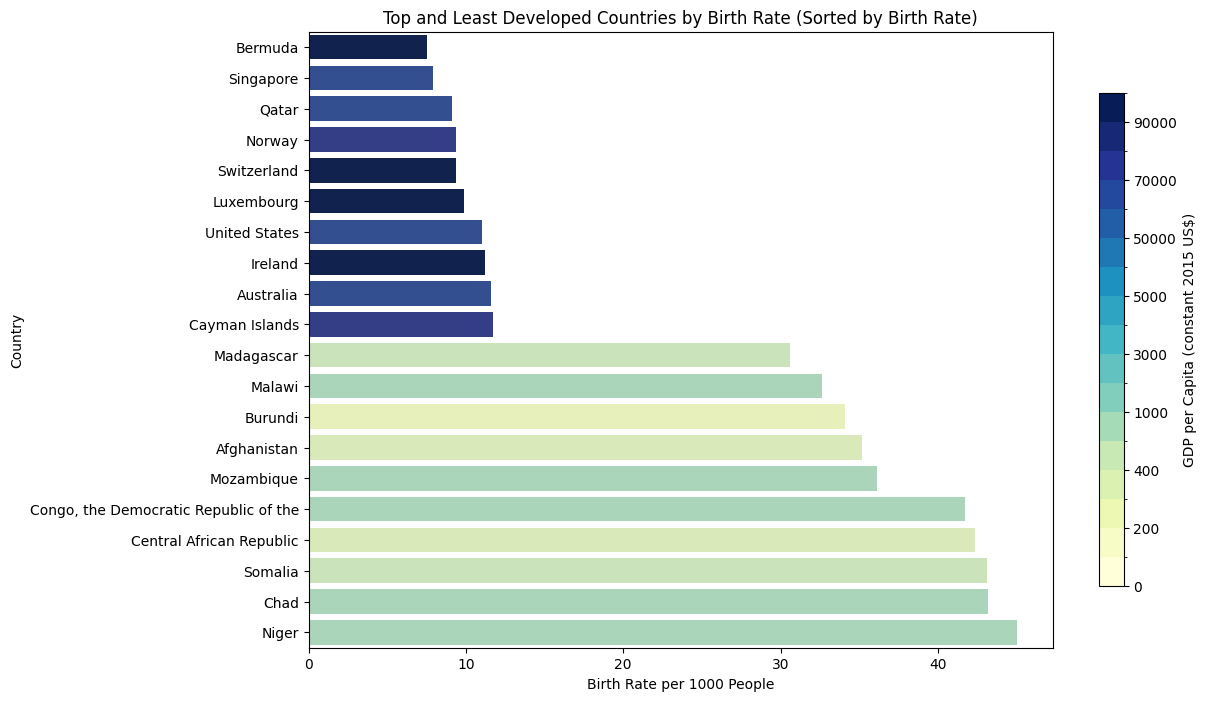

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import BoundaryNorm


data = pd.read_csv("/content/drive/MyDrive/UNICEF_Storytelling_Project/unicef_metadata.csv")


data_2022 = data[data['year'] == 2022]


top_developed = [
    "Australia", "Bermuda", "Luxembourg", "Ireland", "Switzerland",
    "Cayman Islands", "Norway", "Singapore", "United States", "Qatar"
]
least_developed = [
    "Burundi", "Afghanistan", "Central African Republic", "Madagascar", "Somalia",
    "Congo, the Democratic Republic of the", "Malawi", "Niger", "Chad", "Mozambique"
]


top_data = data_2022[data_2022['country'].isin(top_developed)]
least_data = data_2022[data_2022['country'].isin(least_developed)]


combined_data = pd.concat([top_data, least_data])


combined_data = combined_data.sort_values(by='Birth rate, crude (per 1,000 people)', ascending=True)


gdp_bins = [0, 100, 200, 300, 400, 500, 1000, 2000, 3000, 4000, 5000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
norm = BoundaryNorm(boundaries=gdp_bins, ncolors=256)

fig, ax = plt.subplots(figsize=(12, 8))

# Step 10: Plot the bar chart with the updated color scale
sns.barplot(x='Birth rate, crude (per 1,000 people)', y='country', data=combined_data,
            palette=sns.color_palette("YlGnBu", as_cmap=True),
            hue='GDP per capita (constant 2015 US$)', dodge=False,
            hue_norm=norm, ax=ax)

# Step 11: Title and labels
ax.set_title('Top and Least Developed Countries by Birth Rate (Sorted by Birth Rate)')
ax.set_xlabel('Birth Rate per 1000 People')
ax.set_ylabel('Country')

# Step 12: Remove the hue legend (GDP per capita legend)
ax.get_legend().remove()

# Step 13: Create a color bar for the GDP per capita with the specific breaks
sm = plt.cm.ScalarMappable(cmap="YlGnBu", norm=norm)
sm.set_array([])  # Make the color scale appear without needing data
cbar = fig.colorbar(sm, ax=ax, label="GDP per Capita (constant 2015 US$)", shrink=0.8)


plt.show()

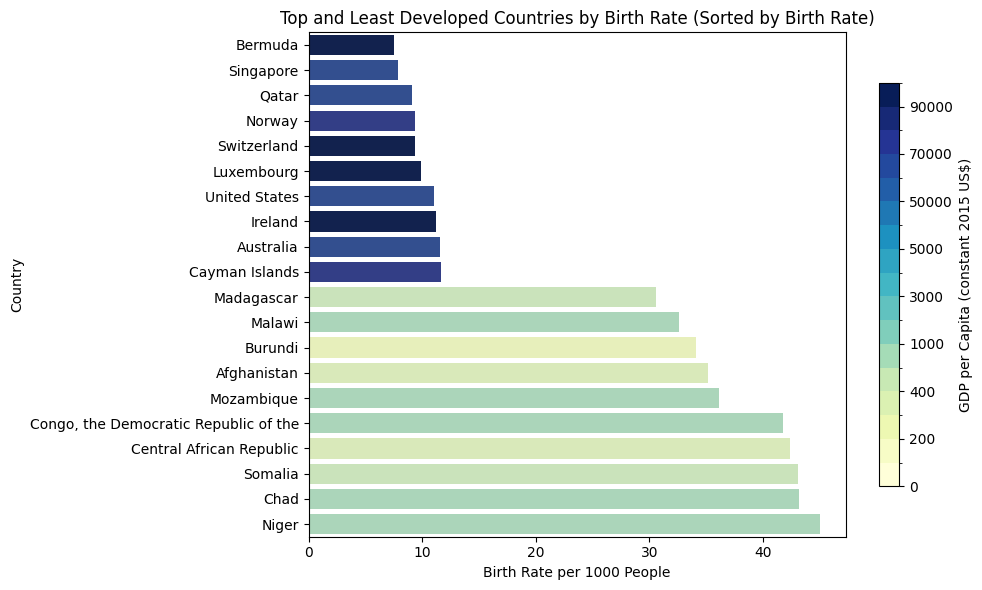

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Assuming norm and combined_data are already defined

# Step 1: Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Step 2: Create the barplot
sns.barplot(x='Birth rate, crude (per 1,000 people)', y='country', data=combined_data,
            palette=sns.color_palette("YlGnBu", as_cmap=True),
            hue='GDP per capita (constant 2015 US$)', dodge=False,
            hue_norm=norm, ax=ax)

# Step 3: Title and labels
ax.set_title('Top and Least Developed Countries by Birth Rate (Sorted by Birth Rate)')
ax.set_xlabel('Birth Rate per 1000 People')
ax.set_ylabel('Country')

# Step 4: Remove the hue legend (GDP per capita legend)
ax.get_legend().remove()

# Step 5: Create a color bar for the GDP per capita with the specific breaks
sm = plt.cm.ScalarMappable(cmap="YlGnBu", norm=norm)
sm.set_array([])  # Make the color scale appear without needing data
cbar = fig.colorbar(sm, ax=ax, label="GDP per Capita (constant 2015 US$)", shrink=0.8)

# Step 6: Save the plot as a PNG image
plt.tight_layout()  # To make sure everything fits properly
plt.savefig('birth_rate_gdp_comparison.png', dpi=300)  # Save as PNG

# Step 7: Show the plot
plt.show()

# If you're in a Colab environment, you can also use this to download the image
from google.colab import files
files.download('birth_rate_gdp_comparison.png')
